## Tissue Clustering using sets of genetic variables


In [32]:
# Import Required Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import xlsxwriter
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [33]:
file_path = '/Users/madhuri/Desktop/MasterThesis/Part1/LM_ten_for_clustering.csv'
#LM_top10_clean.

In [34]:
top_10_tissues_lm = pd.read_csv(file_path)

In [35]:
top_10_tissues_lm['tissue_name'].value_counts()

Leukemia patient sample                                          2096
Breast                                                           1182
HumanAorticEndothelialCells                                      1014
Lymphoblastoid cell line                                          817
pre-treatment bone marrow                                         817
PBMC                                                              550
primary colorectal adenocarcinoma                                 519
airway epithelial cells obtained by bronchoscopy and brushing     333
colon cancer tissue                                               331
Cardiff                                                           314
Name: tissue_name, dtype: int64

In [36]:
top_10_tissues_lm.head()

,200618_at,200811_at,201007_at,201127_s_at,201153_s_at,201161_s_at,201207_at,201223_s_at,201225_s_at,201236_s_at,...,200868_s_at,200869_at,200871_s_at,200872_at,200874_s_at,200875_s_at,200877_at,200878_at,200879_s_at,tissue_name
0,11.8291,11.8197,10.9594,7.9837,8.2990,10.7600,7.5773,8.8964,10.8289,12.2771,...,9.8028,14.6105,14.0292,12.6916,6.4913,9.5160,12.3179,13.9055,6.9347,airway epithelial cells obtained by bronchosco...
1,11.0078,11.1135,11.2531,7.6897,10.4160,12.2918,7.3879,9.8998,10.6678,8.8367,...,8.6877,14.6908,14.6449,13.6077,6.7249,9.3521,12.2742,13.9110,6.4580,airway epithelial cells obtained by bronchosco...
2,10.8521,11.1002,11.0970,7.5435,9.7278,11.5294,7.0438,10.0822,10.4840,10.0382,...,8.1361,14.5768,13.1049,12.2742,6.3506,9.7338,12.1892,13.5563,6.2913,airway epithelial cells obtained by bronchosco...
3,10.3807,11.0173,10.7128,7.3652,10.4018,11.2197,7.3790,10.1778,11.1420,9.2288,...,7.6369,11.9033,13.4562,12.1864,6.1411,9.1274,11.8624,13.3270,6.1857,airway epithelial cells obtained by bronchosco...
4,11.3819,11.3896,10.8832,8.0384,8.5293,11.2620,7.5531,9.9026,10.9209,11.3762,...,9.1326,14.7207,13.6972,11.7192,6.8468,9.8641,12.5031,13.6181,6.4859,airway epithelial cells obtained by bronchosco...


In [37]:
kdf = top_10_tissues_lm.drop(['tissue_name'], axis=1)

In [38]:
y=top_10_tissues_lm['tissue_name']

In [39]:
from sklearn import preprocessing

In [78]:
le = preprocessing.LabelEncoder()
y_original= le.fit_transform(y)

In [52]:
y[:20]

0     airway epithelial cells obtained by bronchosco...
1     airway epithelial cells obtained by bronchosco...
2     airway epithelial cells obtained by bronchosco...
3     airway epithelial cells obtained by bronchosco...
4     airway epithelial cells obtained by bronchosco...
5     airway epithelial cells obtained by bronchosco...
6     airway epithelial cells obtained by bronchosco...
7     airway epithelial cells obtained by bronchosco...
8     airway epithelial cells obtained by bronchosco...
9     airway epithelial cells obtained by bronchosco...
10    airway epithelial cells obtained by bronchosco...
11    airway epithelial cells obtained by bronchosco...
12    airway epithelial cells obtained by bronchosco...
13    airway epithelial cells obtained by bronchosco...
14    airway epithelial cells obtained by bronchosco...
15    airway epithelial cells obtained by bronchosco...
16    airway epithelial cells obtained by bronchosco...
17    airway epithelial cells obtained by bronch

In [15]:
y_lab[:20]

array([0, 6, 2, 2, 2, 3, 6, 5, 3, 2, 1, 2, 2, 1, 3, 1, 2, 3, 2, 4])

In [16]:
y_lab[21:30]

array([2, 2, 6, 0, 9, 1, 6, 8, 3])

In [ ]:
#scaled_lm['tissue_name']=kdf

In [27]:
org_centroids = top_10_tissues_lm.groupby('tissue_name', as_index=False).mean()

In [30]:
org_centroids.shape


(10, 979)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
#Standardizing
sc=StandardScaler()
kdf_scaled = sc.fit_transform(kdf)

In [42]:
# Performing Kmeans

# Number of clusters
kmeans = KMeans(n_clusters=10, random_state=0)
# kmeans = KMeans(n_clusters=2)
# Fitting the input data
kmeans = kmeans.fit(kdf_scaled)
# Getting the cluster labels
labels = kmeans.predict(kdf_scaled)
# Centroid values
centroids = kmeans.cluster_centers_

In [31]:
centroids.shape

(10, 978)

In [26]:
print(centroids[1])
len(centroids[1])

[-2.65298094e-01  2.71351394e-01 -1.39500822e-01 -4.97063086e-01
  6.27347776e-01  5.81648890e-01 -9.26337262e-01  6.04428865e-03
  6.30256792e-01  4.54510955e-02 -1.66383244e-01 -1.59296137e-01
  2.86180503e-01  1.22087242e-01 -1.59134650e-01  2.51283461e-01
 -4.92233845e-02  7.73880989e-01  6.47880756e-01  3.87046493e-01
  8.63452321e-02 -2.76036002e-01 -7.27407136e-01 -1.92943783e-01
  2.55066981e-01 -9.61591677e-01  9.87116731e-01  3.80556674e-01
  2.87660264e-01 -5.52513667e-02  2.07261981e-03 -2.46800874e-01
 -3.49849763e-01  2.37074362e-01 -1.48102943e-01  4.52788111e-01
  4.31328831e-01 -1.69538065e-01  4.02859450e-01 -2.16941124e-01
  5.06301256e-01 -4.12187255e-01  8.68795546e-01 -1.27100844e-01
  6.43569917e-01 -8.61758256e-02  2.35550976e-01 -5.04338447e-01
  5.15852199e-01 -3.59155139e-01  3.17602976e-01  8.21603934e-01
  9.84614474e-02 -4.82921514e-02  1.38601743e-01  4.72836731e-01
 -6.51308109e-01  2.61351841e-01  5.09967719e-01  3.76232212e-01
 -1.09021088e+00 -6.63903

978

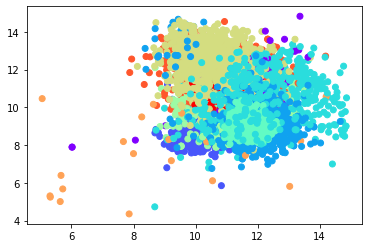

In [43]:
plt.scatter(kdf.iloc[:,0],kdf.iloc[:,1], c=kmeans.labels_, cmap='rainbow')

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

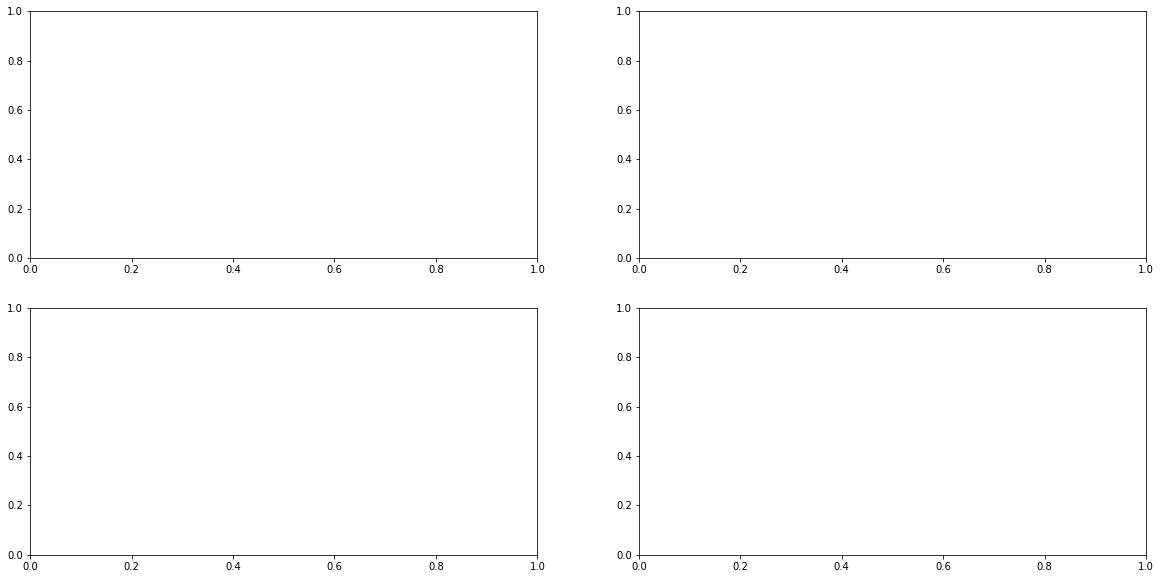

In [26]:
#fig=plt.figure()
#axes=fig.add_subplot()
#scats=axes.scatter(kdf[:,0], kdf[:,1], c=labels, cmap = 'Accent', s=10)
#plt.show()
fig, axes = plt.subplots(2,2, figsize=(20,10))
axes.scatter(kdf.iloc[:,0], kdf.iloc[:,1], c=labels, cmap = 'Accent', s=10)



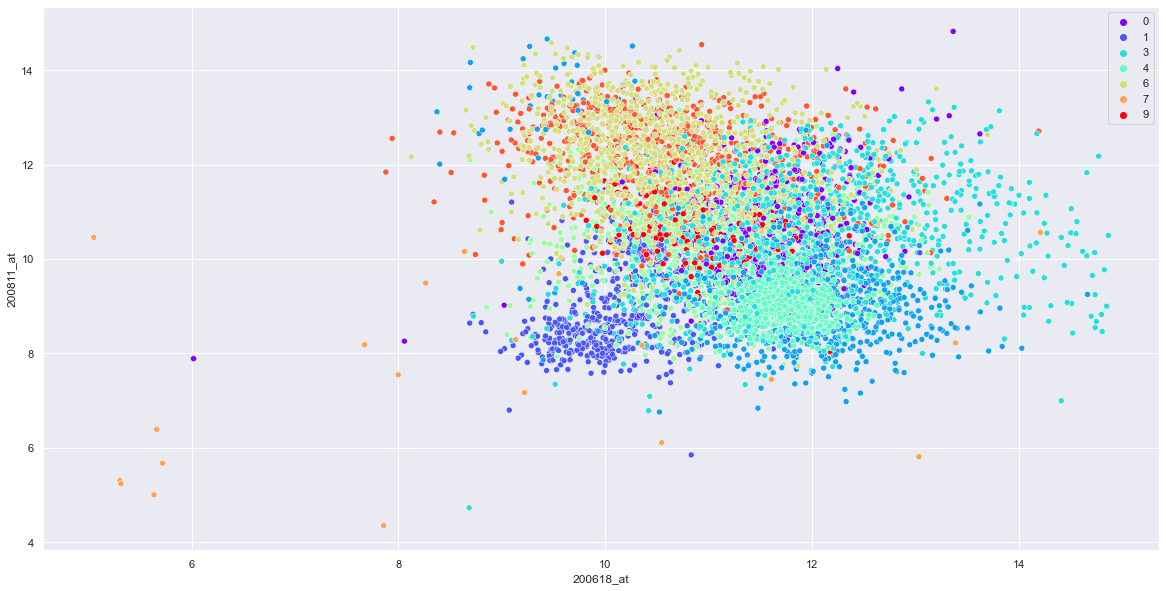

In [46]:
f, ax = plt.subplots()
sns.color_palette("rocket")
sns.set(rc = {'figure.figsize':(20,10)})
sns.scatterplot(data=kdf, x=kdf.iloc[:,0], y=kdf.iloc[:,1], hue=kmeans.labels_, palette='rainbow')
f.savefig("clust2.png")

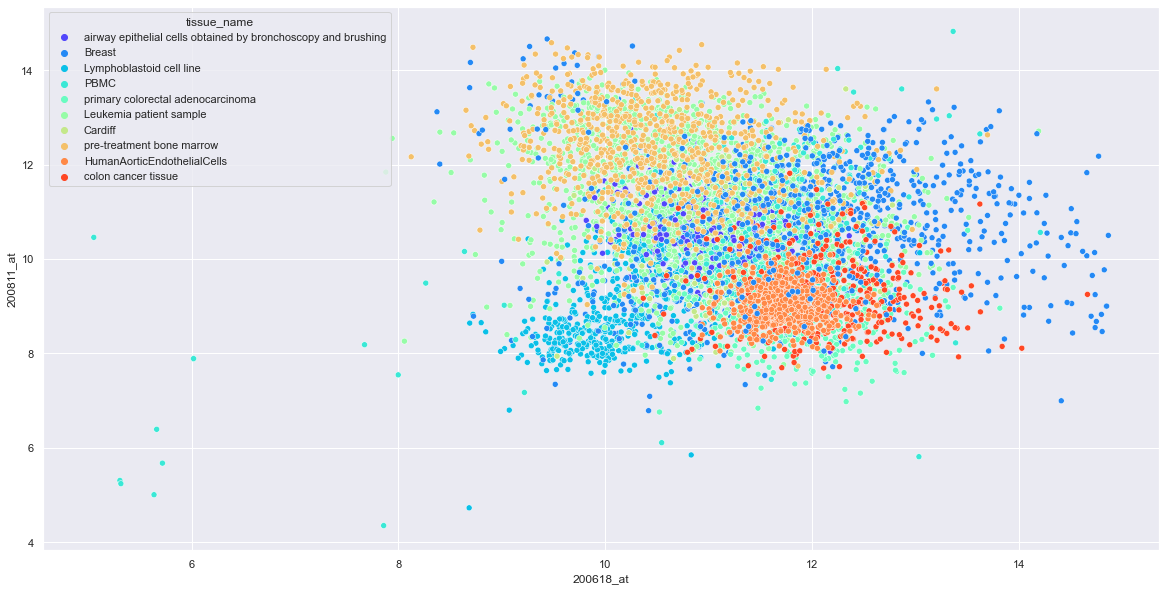

In [45]:
f, ax = plt.subplots()
sns.color_palette("rocket")
sns.set(rc = {'figure.figsize':(20,10)})
sns.scatterplot(data=kdf, x=kdf.iloc[:,0], y=kdf.iloc[:,1], hue=y, palette='rainbow')
f.savefig("lm2.png")

In [12]:
# labels[0:1000]

In [80]:
from scipy.optimize import linear_sum_assignment as linear_assignment

In [83]:
def cluster_acc(y_true, y_pred):
    """
    Calculate clustering accuracy. Require scikit-learn installed

    # Arguments
        y: true labels, numpy.array with shape `(n_samples,)`
        y_pred: predicted labels, numpy.array with shape `(n_samples,)`

    # Return
        accuracy, in [0,1]
    """
    y_true = y_true.astype(np.int64)
    assert y_pred.size == y_true.size
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
    ind = linear_assignment(w.max() - w)
    print (ind)
    return sum([w[i, j] for i, j in ind]) * 1.0 / (y_pred.size)


In [84]:
y_lab.shape

(7973,)

In [85]:
labels.shape

(7973,)

In [86]:
cluster_acc(y_original,labels)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([5, 4, 9, 0, 2, 3, 8, 7, 1, 6]))


ValueError: too many values to unpack (expected 2)

In [47]:
# Datapoints count in each Clusters
uniqueValues, occurCount = np.unique(labels, return_counts=True)
 
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1 2 3 4 5 6 7 8 9]
Occurrence Count :  [ 580  820  892 1140 1014 1502  813   20  859  333]


In [48]:
#sorting cluster in descending order
sort_labels = np.argsort(-occurCount)[:10]
sort_labels

array([5, 3, 4, 2, 8, 1, 6, 0, 9, 7])

In [49]:
top_10_tissues_lm['tissue_name'].value_counts()

Leukemia patient sample                                          2096
Breast                                                           1182
HumanAorticEndothelialCells                                      1014
Lymphoblastoid cell line                                          817
pre-treatment bone marrow                                         817
PBMC                                                              550
primary colorectal adenocarcinoma                                 519
airway epithelial cells obtained by bronchoscopy and brushing     333
colon cancer tissue                                               331
Cardiff                                                           314
Name: tissue_name, dtype: int64

In [14]:
labels

array([1, 5, 6, ..., 5, 6, 8], dtype=int32)

In [15]:
sort_labels

array([6, 5, 0, 8, 3, 4, 2, 9, 1, 7])

In [15]:
#This function is to encode the 'tissue_type' based on the size of clusters so that the order matches. For eg, cluster 6 has the max number
#of genes, so for the original labels, the 'Lukemic cells' have maximum number and therefore, it is encoded as 6 
def encoder(x):
    if('Leukemic cells' in x):
        return 1
    elif('breast cancer' in x):
        return 7
    elif('PBMC' in x):
        return 2
    elif('pre-treatment bone marrow' in x):
        return 3
    elif('Lymphoblastoid_cell_line' in x):
        return 6
    elif('HumanAorticEndothelialCells' in x):   
        return 4    
    elif('Blasts and mononuclear cells, AML patient' in x):
        return 5
    elif('primary colorectal adenocarcinoma' in x):
        return 9
    elif('colon cancer tissue' in x):
        return 0
    elif('airway epithelial cells' in x):
        return 8
    

In [16]:
y.head(10)

0    Blasts and mononuclear cells, AML patient
1                               breast cancer 
2                              Leukemic cells 
3                              Leukemic cells 
4                              Leukemic cells 
5                     Lymphoblastoid_cell_line
6                               breast cancer 
7                     airway epithelial cells 
8                     Lymphoblastoid_cell_line
9                              Leukemic cells 
Name: tissue_name, dtype: object

In [17]:
#encoding 'tissue_type' based on the numbers in the clusters which means the 'tissue_type' with the highest value_count is coded 
#the same as the largest cluster and so on
y_encoded=[]
for i in range(len(y)):
    y_encoded.insert(i,encoder(y[i]))
   

In [18]:
y_encoded[:5]


[5, 7, 1, 1, 1]

In [19]:
# Import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [20]:
# Confusion matrix
print(confusion_matrix(y_encoded, labels))

[[   0    0    0    0  320    0    0   11    0    0]
 [   0 2090  566    5    0    0    0    0    0    1]
 [   0  275  546    0    0    0    0    0   21    0]
 [   0    3    0    0    0    0  814    0    0    0]
 [   0    0    0    0    0  629    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0  525]
 [   0    0    0  816    0    0    0    1    0    0]
 [   0    3    3    0   10    0    0 1395    2    3]
 [ 298    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0  452    0    0    3    0    0]]


In [21]:
# Classification report
print(classification_report(y_encoded, labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       331
           1       0.88      0.79      0.83      2662
           2       0.49      0.65      0.56       842
           3       0.00      0.00      0.00       817
           4       0.00      0.00      0.00       629
           5       0.00      0.00      0.00       525
           6       0.00      0.00      0.00       817
           7       0.99      0.99      0.99      1416
           8       0.00      0.00      0.00       298
           9       0.00      0.00      0.00       455

    accuracy                           0.46      8792
   macro avg       0.24      0.24      0.24      8792
weighted avg       0.47      0.46      0.46      8792



In [22]:
# Accuracy score
print(accuracy_score(y_encoded, labels))

0.45848498635122836
